(161, 167, 3)
{'dx': 167, 'dy': 161, 'x0': 228, 'y0': 158}


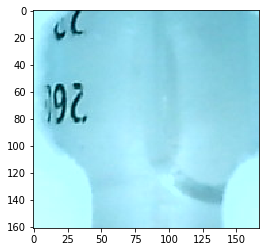

In [15]:
import cv2
import json
import matplotlib.pyplot as plt
import pickle

filename = '../dump/holder_192.168.44.102.png'
frame = cv2.imread(filename)

annotations = json.loads(open('../../models/annotaion.json').read())

clf = pickle.load(open('../../models/holder_102.clf', 'rb'))

node = '102'
component = 'holder'

roi = annotations[node][component+'_roi']
x0 = roi['x0']
y0 = roi['y0']
x1 = roi['dx'] + roi['x0']
y1 = roi['dy'] + roi['y0']

frame = frame[y0:y1, x0:x1, :]
plt.imshow(frame)
print(frame.shape)
print(annotations[node][component+'_roi'])

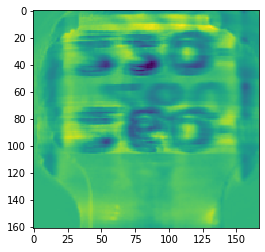

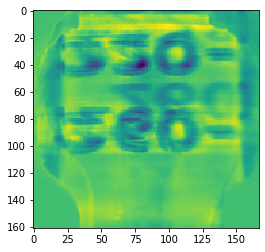

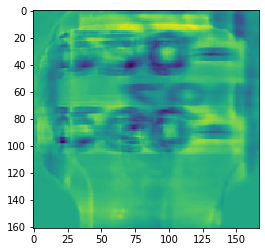

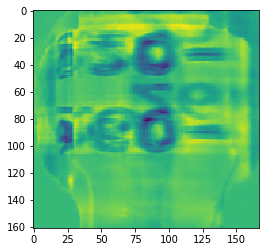

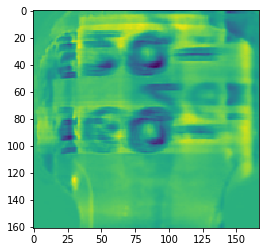

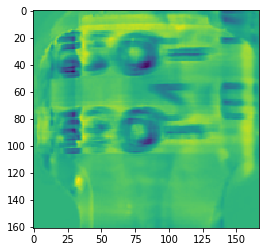

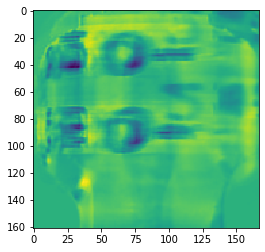

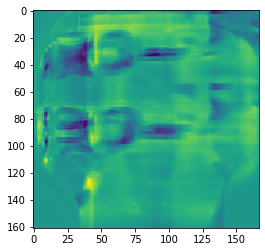

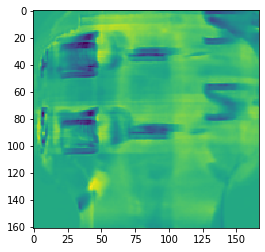

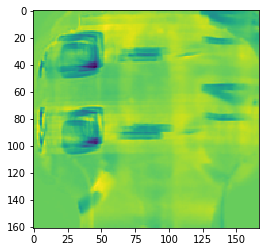

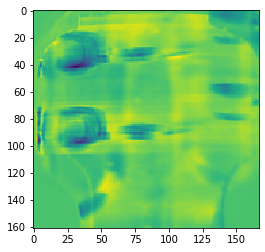

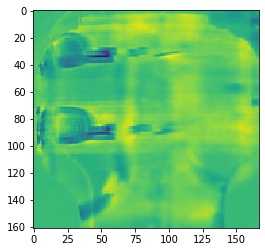

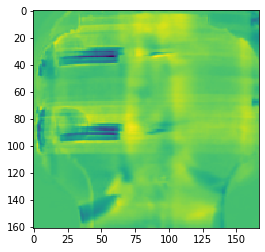

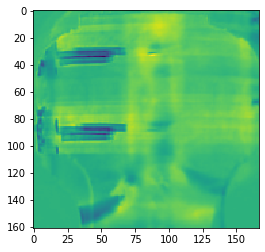

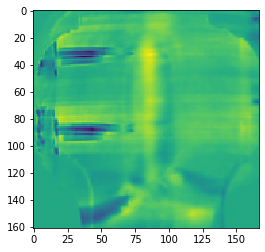

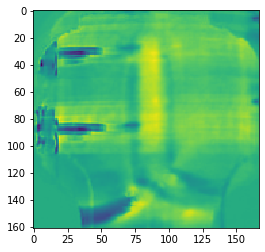

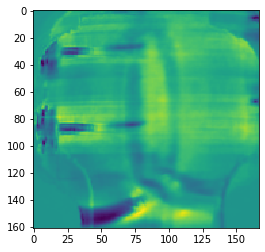

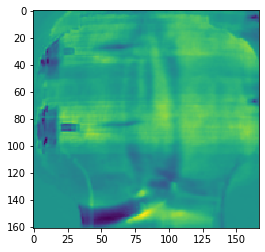

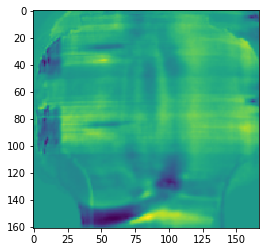

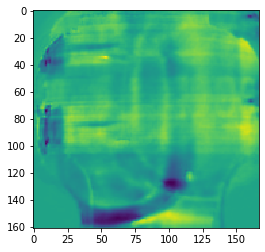

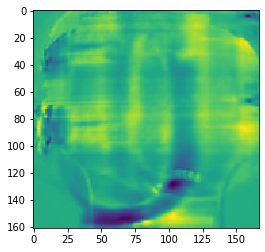

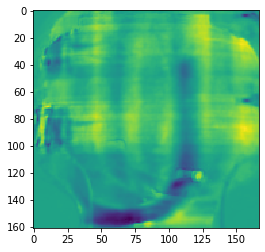

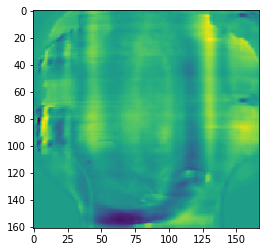

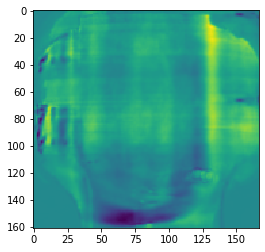

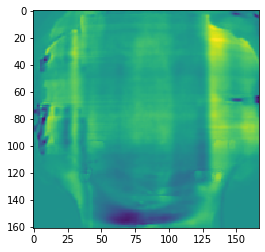

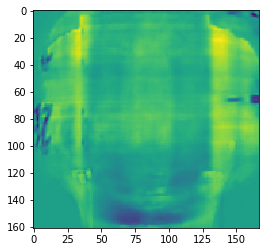

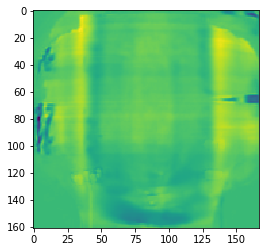

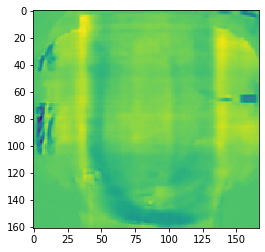

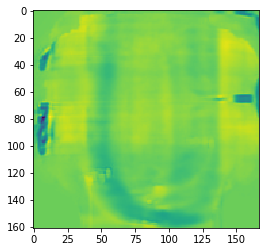

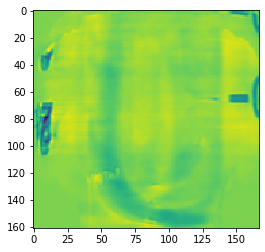

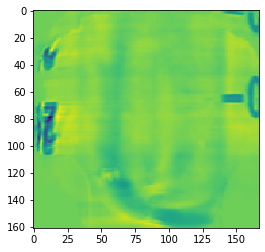

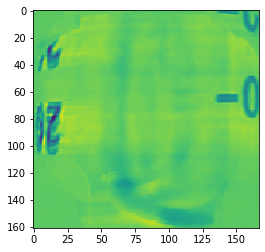

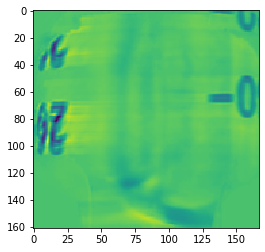

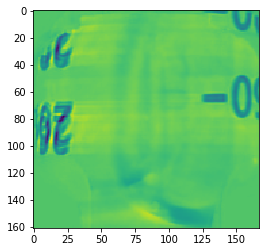

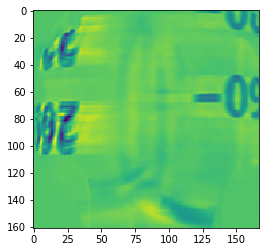

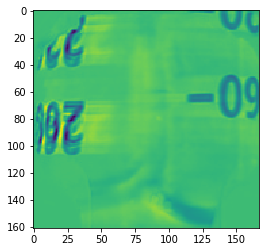

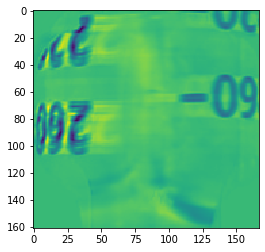

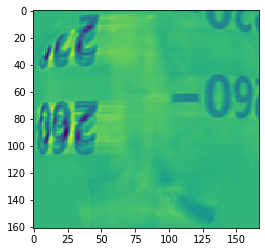

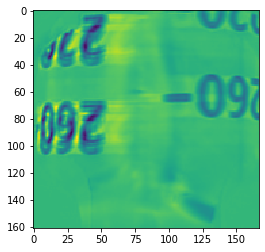

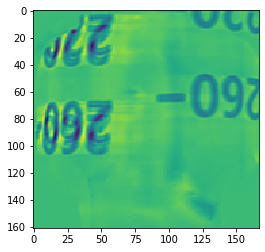

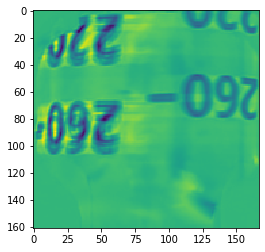

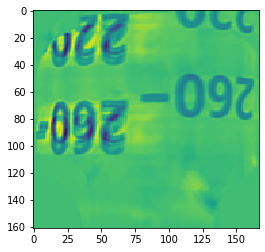

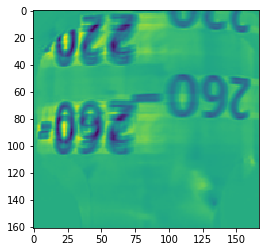

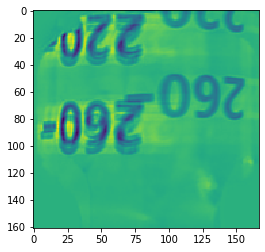

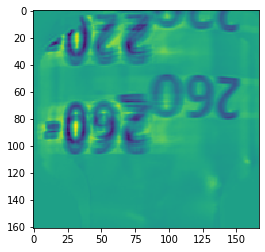

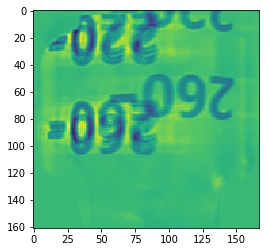

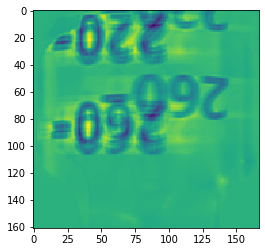

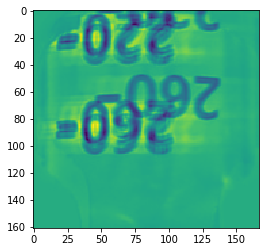

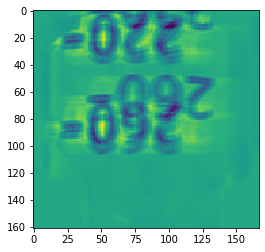

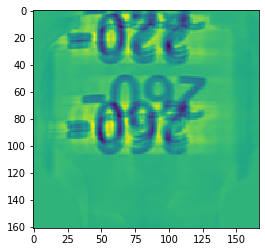

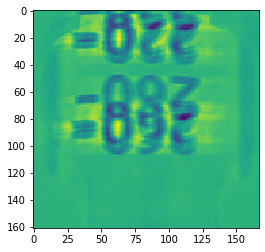

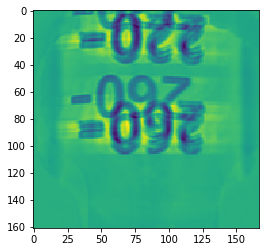

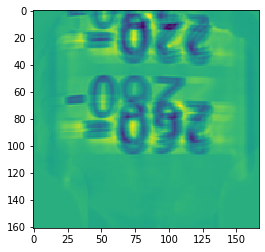

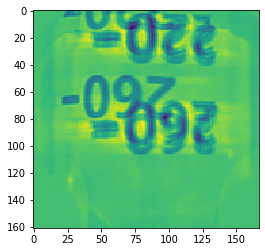

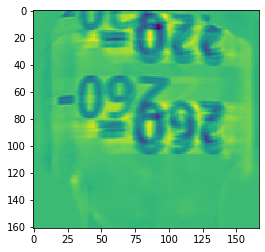

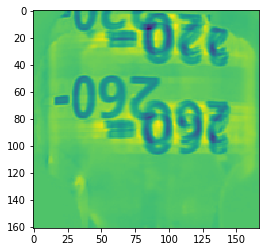

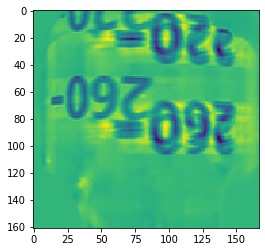

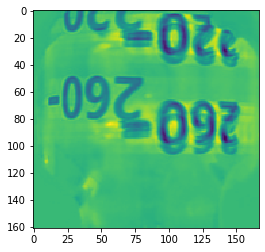

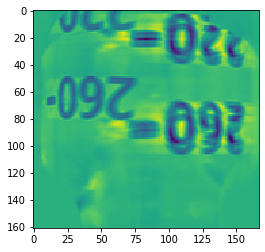

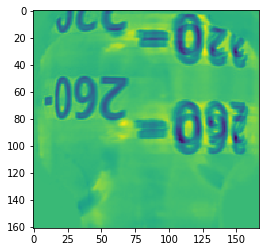

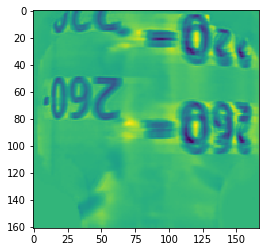

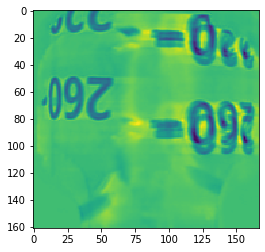

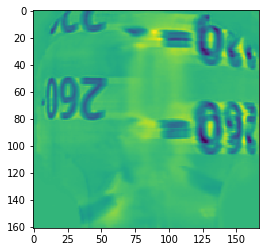

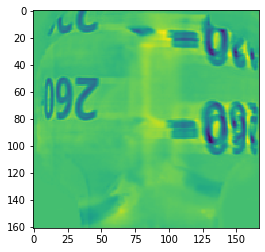

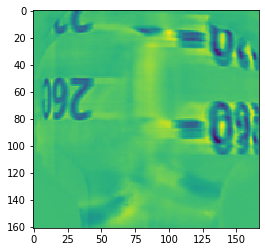

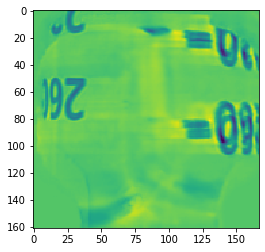

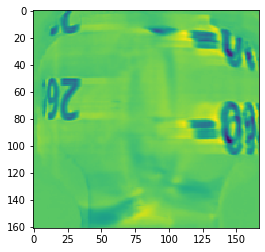

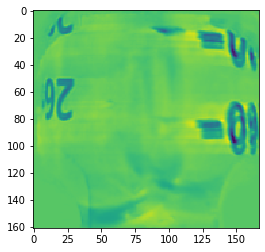

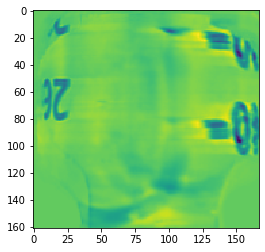

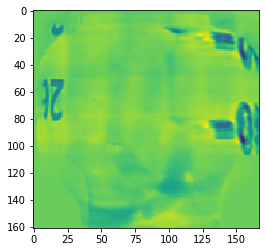

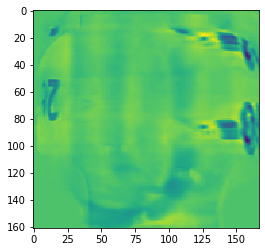

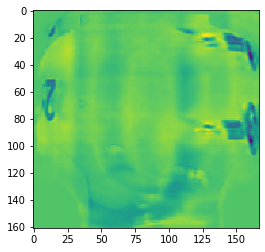

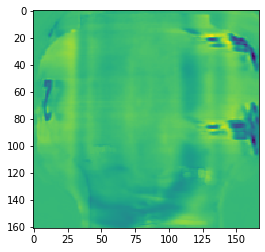

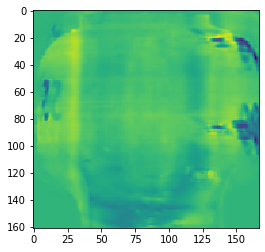

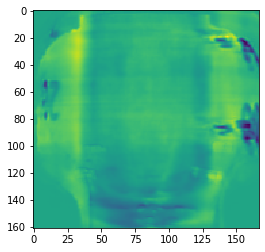

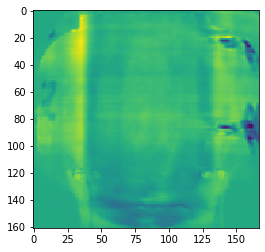

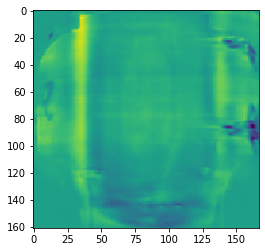

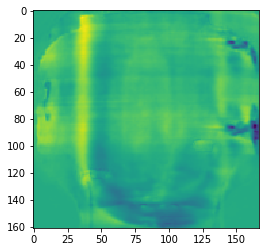

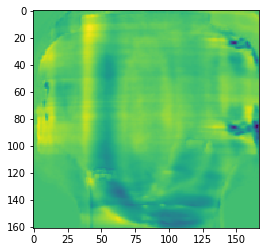

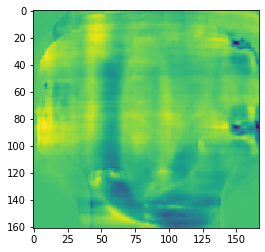

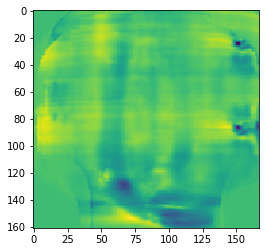

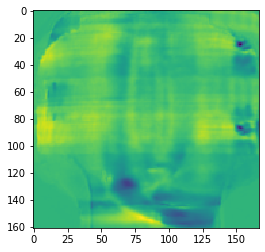

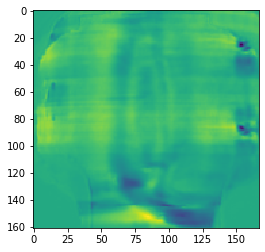

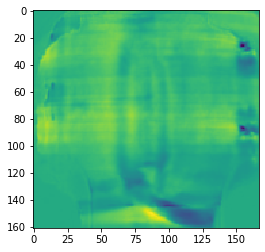

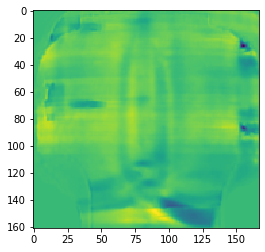

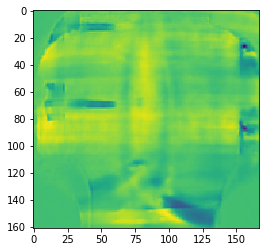

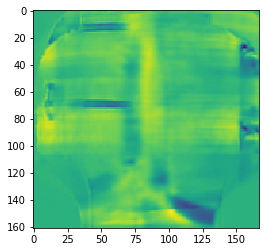

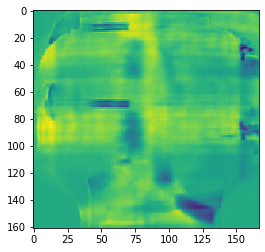

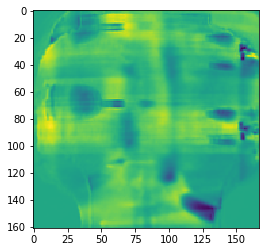

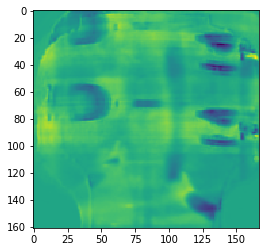

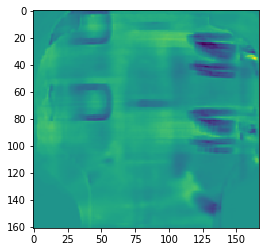

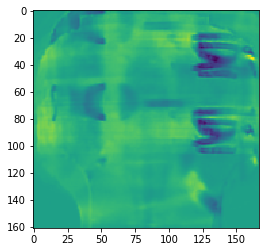

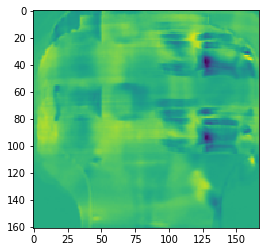

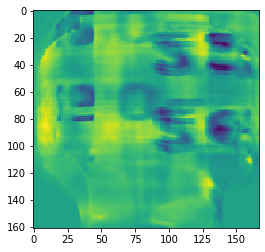

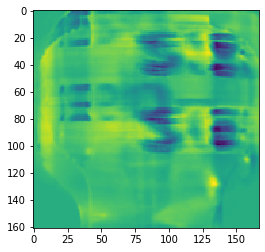

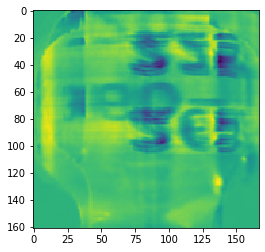

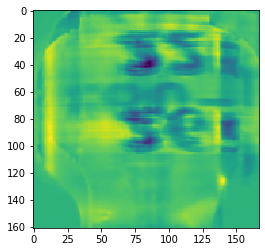

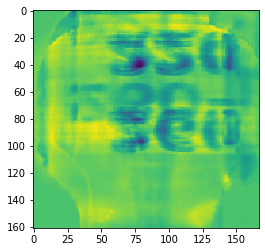

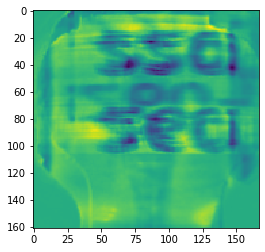

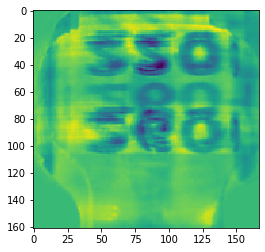

In [19]:
import numpy as np
coefs = np.array([j.base_estimator.coef_ for j in clf.calibrated_classifiers_]).mean(axis=0)
coefs = coefs.reshape(coefs.shape[0], roi['dy'], -1)

for i in range(coefs.shape[0]):
    plt.figure(i)
    plt.imshow(coefs[i])
    plt.show()